# Sequences tagging using NLTK

In [1]:
import nltk
from nltk import word_tokenize

text = 'Karim bought a Lenovo computer with over 70000 DZD when he was in Algiers, Algeria.'
text_fr = 'Karim a acheté un ordinateur de mark Lenovo.'

text_tokens = word_tokenize(text)
text_tokens_fr = word_tokenize(text_fr)

print(text_tokens)
print(text_tokens_fr)

['Karim', 'bought', 'a', 'Lenovo', 'computer', 'with', 'over', '70000', 'DZD', 'when', 'he', 'was', 'in', 'Algiers', ',', 'Algeria', '.']
['Karim', 'a', 'acheté', 'un', 'ordinateur', 'de', 'mark', 'Lenovo', '.']


## I. Part of Speech (PoS) tagging

In [2]:
from nltk.tag import str2tuple
# will be used for training
text_train_fr = [
    'un/DET ordianteur/NOUN peut/VERB vous/PRON aider/VERB',
    'il/PRON veut/VERB vous/PRON aider/VERB',
    'il/PRON veut/VERB un/DET ordinateur/NOUN',
    'il/PRON peut/VERB nager/VERB'
]

data_train_fr = [[str2tuple(mot) for mot in sentence.split()] for sentence in text_train_fr]
    
data_train_fr

[[('un', 'DET'),
  ('ordianteur', 'NOUN'),
  ('peut', 'VERB'),
  ('vous', 'PRON'),
  ('aider', 'VERB')],
 [('il', 'PRON'), ('veut', 'VERB'), ('vous', 'PRON'), ('aider', 'VERB')],
 [('il', 'PRON'), ('veut', 'VERB'), ('un', 'DET'), ('ordinateur', 'NOUN')],
 [('il', 'PRON'), ('peut', 'VERB'), ('nager', 'VERB')]]

In [3]:
data_gold_fr = [
    [('il', 'PRON'), ('veut', 'VERB'), ('nager', 'VERB')],
    [('un', 'DET'), ('enfant', 'NOUN'), ('peut', 'VERB'), ('nager', 'VERB')]
]

data_test_fr = []
for senttag in data_gold_fr:
    sent = []
    data_test_fr.append(sent)
    for wordtag in senttag:
        sent.append(wordtag[0])

data_test_fr

[['il', 'veut', 'nager'], ['un', 'enfant', 'peut', 'nager']]

### I.1. PoS prediction

In [4]:
from nltk import pos_tag

pos_tags = pos_tag(text_tokens)

pos_tags

[('Karim', 'NNP'),
 ('bought', 'VBD'),
 ('a', 'DT'),
 ('Lenovo', 'NNP'),
 ('computer', 'NN'),
 ('with', 'IN'),
 ('over', 'IN'),
 ('70000', 'CD'),
 ('DZD', 'NNS'),
 ('when', 'WRB'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('Algiers', 'NNP'),
 (',', ','),
 ('Algeria', 'NNP'),
 ('.', '.')]

In [5]:
# NotImplementedError: Currently, NLTK pos_tag only supports English and Russian (i.e. lang='eng' or lang='rus')
#pos_tags_fr = pos_tag(text_tokens_fr, lang='fra')

#pos_tags_fr

### I.2. PoS detection using RegEx 

In [6]:
from nltk.tag import RegexpTagger

patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
]

regexp_tagger = RegexpTagger(patterns)


pos_tags2 = regexp_tagger.tag(text_tokens)

pos_tags2

[('Karim', 'NN'),
 ('bought', 'NN'),
 ('a', 'NN'),
 ('Lenovo', 'NN'),
 ('computer', 'NN'),
 ('with', 'NN'),
 ('over', 'NN'),
 ('70000', 'CD'),
 ('DZD', 'NN'),
 ('when', 'NN'),
 ('he', 'NN'),
 ('was', 'NNS'),
 ('in', 'NN'),
 ('Algiers', 'NNS'),
 (',', 'NN'),
 ('Algeria', 'NN'),
 ('.', 'NN')]

### I.4. PoS training using CRF

In [7]:
%pip install python-crfsuite
# NLTK uses an external tool for this
# so, you have to install it first

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
from nltk.tag import CRFTagger
crf_tagger = CRFTagger()

# you can change the location of saving
crf_tagger_path = '/home/kariminf/Data/tutoriel/crf.tagger.fr'

#to save the model
crf_tagger.train(data_train_fr, crf_tagger_path)

tagged_sents = crf_tagger.tag_sents([['il','peut','aider'], ['un','ordinateur','peut', 'aider']])

tagged_sents

[[('il', 'PRON'), ('peut', 'VERB'), ('aider', 'VERB')],
 [('un', 'DET'), ('ordinateur', 'NOUN'), ('peut', 'VERB'), ('aider', 'VERB')]]

In [9]:
#charging the saved model
crf_tagger_charged = CRFTagger()
crf_tagger_charged.set_model_file(crf_tagger_path)

# to tag one sentence
crf_tagger_charged.tag(['il','veut','nager'])

[('il', 'PRON'), ('veut', 'VERB'), ('nager', 'VERB')]

In [10]:
print(crf_tagger.tag_sents(data_test_fr))
# accuracy
crf_tagger.evaluate(data_gold_fr)

[[('il', 'PRON'), ('veut', 'VERB'), ('nager', 'VERB')], [('un', 'DET'), ('enfant', 'PRON'), ('peut', 'VERB'), ('nager', 'VERB')]]


0.8571428571428571

### I.5. PoS training using HMM

In [11]:
from nltk.tag.hmm import HiddenMarkovModelTrainer

hmm_tagger_trainer = HiddenMarkovModelTrainer()

hmm_tagger = hmm_tagger_trainer.train_supervised(data_train_fr)

hmm_tagger.tag(['il','veut','nager'])

[('il', 'PRON'), ('veut', 'VERB'), ('nager', 'VERB')]

In [12]:
print("log probability: ", hmm_tagger.log_probability(['il','veut','nager']))
print("probability: ", hmm_tagger.probability(['il','veut','nager']))
print("point entropy: ", hmm_tagger.point_entropy(['il','veut','nager']))

hmm_tagger.test(data_gold_fr, verbose=True)

log probability:  -6e+300
probability:  0.0
point entropy:  [0. 0. 0.]
Test: il/PRON veut/VERB nager/VERB

Untagged: il veut nager

HMM-tagged: il/PRON veut/VERB nager/VERB

Entropy: 4.440892098500626e-16

------------------------------------------------------------
Test: un/DET enfant/NOUN peut/VERB nager/VERB

Untagged: un enfant peut nager

HMM-tagged: un/DET enfant/DET peut/DET nager/DET

Entropy: 4.614709844115209

------------------------------------------------------------
accuracy over 7 tokens: 57.14


In [13]:
print(hmm_tagger.tag_sents(data_test_fr))
# accuracy
hmm_tagger.evaluate(data_gold_fr)

[[('il', 'PRON'), ('veut', 'VERB'), ('nager', 'VERB')], [('un', 'DET'), ('enfant', 'DET'), ('peut', 'DET'), ('nager', 'DET')]]


0.5714285714285714

### I.6. PoS training using PerceptronTagger

In [14]:
from nltk.tag.perceptron import PerceptronTagger

# use a pretrained model for english
pcpt_tagger_pre = PerceptronTagger()

pcpt_tagger_pre.tag(text_tokens)

[('Karim', 'NNP'),
 ('bought', 'VBD'),
 ('a', 'DT'),
 ('Lenovo', 'NNP'),
 ('computer', 'NN'),
 ('with', 'IN'),
 ('over', 'IN'),
 ('70000', 'CD'),
 ('DZD', 'NNS'),
 ('when', 'WRB'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('Algiers', 'NNP'),
 (',', ','),
 ('Algeria', 'NNP'),
 ('.', '.')]

In [15]:
# create an empty model
p_tagger = PerceptronTagger(load=False)
p_tagger.train(data_train_fr)

crf_tagger.tag_sents([['il','peut','aider'], ['un','ordinateur','peut', 'aider']])

[[('il', 'PRON'), ('peut', 'VERB'), ('aider', 'VERB')],
 [('un', 'DET'), ('ordinateur', 'NOUN'), ('peut', 'VERB'), ('aider', 'VERB')]]

In [16]:
print(crf_tagger.tag_sents(data_test_fr))
# accuracy
crf_tagger.evaluate(data_gold_fr)

[[('il', 'PRON'), ('veut', 'VERB'), ('nager', 'VERB')], [('un', 'DET'), ('enfant', 'PRON'), ('peut', 'VERB'), ('nager', 'VERB')]]


0.8571428571428571

### I.7. PoS training using Brill

In [17]:
from nltk.tag.brill_trainer import BrillTaggerTrainer
from nltk.tbl.template import Template
from nltk.tag.brill import Word, Pos

#clear any templates created in earlier tests
Template._cleartemplates() 
templates = [
    Template(Pos([-1])), # previous PoS tag
    Template(Pos([-1]), Word([0])) # previous Pos tag with current word
]

# we will use the regex ttagger previously presented
# as a backoff tagger
brill_tagger_trainer = BrillTaggerTrainer(regexp_tagger, templates, trace=3)

brill_tagger = brill_tagger_trainer.train(data_train_fr, max_rules=10)

TBL train (fast) (seqs: 4; tokens: 16; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 13 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
   5   5   0   3  | NN->VERB if Pos:NN@[-1]
   2   2   0   0  | NN->VERB if Pos:NNS@[-1]
   2   2   0   0  | NNS->PRON if Pos:VERB@[-1]


In [18]:
print(brill_tagger.tag_sents(data_test_fr))
# accuracy
brill_tagger.evaluate(data_gold_fr)

[[('il', 'NN'), ('veut', 'VERB'), ('nager', 'VERB')], [('un', 'NN'), ('enfant', 'VERB'), ('peut', 'VERB'), ('nager', 'VERB')]]


0.5714285714285714

## II. Named Entity Recognition (NER)

### II.1. Default NER chunker

(S
  (PERSON Karim/NNP)
  bought/VBD
  a/DT
  (GPE Lenovo/NNP)
  computer/NN
  with/IN
  over/IN
  70000/CD
  DZD/NNS
  when/WRB
  he/PRP
  was/VBD
  in/IN
  (GPE Algiers/NNP)
  ,/,
  (GSP Algeria/NNP)
  ./.)


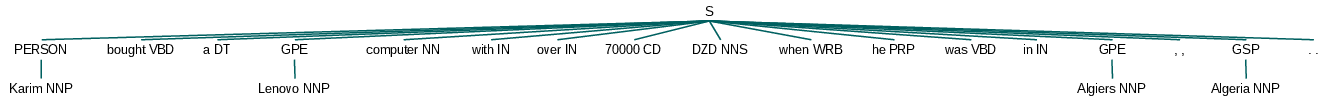

In [19]:
from nltk.chunk import ne_chunk
# from nltk.chunk import ne_chunk_sents
ne_tags = ne_chunk(pos_tags)

print(ne_tags)

ne_tags

### II.2. Train a NER chunker

In [20]:
from nltk.chunk.named_entity import NEChunkParser

# TODO  complete

## III. Chunking

NLTK affords a mechanism to extract different parts of a text. 
For instance, we can extract Noun phrases from a text. 
This mechanism uses regular expressions on tagged text.

(S
  (NP Karim/NNP)
  bought/VBD
  (NP a/DT Lenovo/NNP)
  (NP computer/NN)
  with/IN
  over/IN
  (NP 70000/CD DZD/NNS)
  when/WRB
  (NP he/PRP)
  was/VBD
  in/IN
  (NP Algiers/NNP)
  ,/,
  (NP Algeria/NNP)
  ./.)


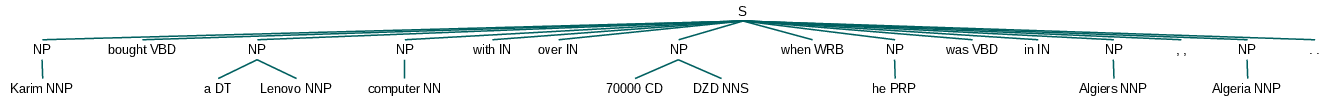

In [21]:
from nltk.chunk.regexp import RegexpParser

grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<DT>?<NNP>+<NN>?}      # chunk sequences of proper nouns
      {<CD><NNS>}             # chunk sequences of values followed by a measurement
      {<PRP>}                 # chunk pronouns
"""

cp = RegexpParser(grammar)

chunks = cp.parse(pos_tags)

print(chunks)

chunks

In [22]:
# texts are represented as trees after chunking
# this is a code how to browse the chunks which are subtrees

for subtree in chunks.subtrees():
    if subtree.label() == 'NP': 
        print(subtree)

(NP Karim/NNP)
(NP a/DT Lenovo/NNP)
(NP computer/NN)
(NP 70000/CD DZD/NNS)
(NP he/PRP)
(NP Algiers/NNP)
(NP Algeria/NNP)


In [23]:
# Just for fun: transforming the tree representation to IOB representation
# The purpose is to showcase the tree API (functionalities)
chunks_iob = []
for pos in range(0, len(chunks)):
    child = chunks[pos]
    try:
        chunk_tag = child.label()
        # we know there are children to the chunk
        words = child.leaves()
        # The first one will be affected B-NP
        # leaves() returns a list of tuples: (word, tag)
        # we will take just the word
        v = words[0][0]
        chunks_iob.append((v, 'B-' + chunk_tag))
        for i in range(1, len(words)):
            v = words[i][0]
            chunks_iob.append((v, 'I-' + chunk_tag))
    except AttributeError:
        # We know that this is a lone node
        v = child[0]
        chunks_iob.append((v, 'O'))

chunks_iob

[('Karim', 'B-NP'),
 ('bought', 'O'),
 ('a', 'B-NP'),
 ('Lenovo', 'I-NP'),
 ('computer', 'B-NP'),
 ('with', 'O'),
 ('over', 'O'),
 ('70000', 'B-NP'),
 ('DZD', 'I-NP'),
 ('when', 'O'),
 ('he', 'B-NP'),
 ('was', 'O'),
 ('in', 'O'),
 ('Algiers', 'B-NP'),
 (',', 'O'),
 ('Algeria', 'B-NP'),
 ('.', 'O')]

In [24]:
from nltk.chunk.util import tree2conllstr
# this can be accomplished by a single instruction

conllstr = tree2conllstr(chunks)

print(conllstr)

Karim NNP B-NP
bought VBD O
a DT B-NP
Lenovo NNP I-NP
computer NN B-NP
with IN O
over IN O
70000 CD B-NP
DZD NNS I-NP
when WRB O
he PRP B-NP
was VBD O
in IN O
Algiers NNP B-NP
, , O
Algeria NNP B-NP
. . O
